**EXPLORATORY DATA ANALYSIS ON Loan Default Prediction DATASET**

***IMPORTING NECESSARY LIBRARIES***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***LOADING THE DATASET***

In [3]:
df = pd.read_csv("/content/Loan_Default.csv")

***ABOUT THE DATASET***

In [4]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [5]:
print("Shape of dataset")
print("Shape of dataset:", df.shape)

Shape of dataset
Shape of dataset: (148670, 34)


In [6]:
print("Data types & missing values")
print(df.info())

Data types & missing values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  U

In [7]:
print("Summary statistics for numerical columns")
print(df.describe().T)

Summary statistics for numerical columns
                         count           mean            std           min  \
ID                    148670.0   99224.500000   42917.476598  24890.000000   
year                  148670.0    2019.000000       0.000000   2019.000000   
loan_amount           148670.0  331117.743997  183909.310127  16500.000000   
rate_of_interest      112231.0       4.045476       0.561391      0.000000   
Interest_rate_spread  112031.0       0.441656       0.513043     -3.638000   
Upfront_charges       109028.0    3224.996127    3251.121510      0.000000   
term                  148629.0     335.136582      58.409084     96.000000   
property_value        133572.0  497893.465696  359935.315562   8000.000000   
income                139520.0    6957.338876    6496.586382      0.000000   
Credit_Score          148670.0     699.789103     115.875857    500.000000   
LTV                   133572.0      72.746457      39.967603      0.967478   
Status                1

In [8]:
print("Summary statistics for categorical columns")
print(df.describe(include=['object', 'category']).T)

Summary statistics for categorical columns
                            count unique       top    freq
loan_limit                 145326      2        cf  135348
Gender                     148670      4      Male   42346
approv_in_adv              147762      2     nopre  124621
loan_type                  148670      3     type1  113173
loan_purpose               148536      4        p3   55934
Credit_Worthiness          148670      2        l1  142344
open_credit                148670      2      nopc  148114
business_or_commercial     148670      2     nob/c  127908
Neg_ammortization          148549      2   not_neg  133420
interest_only              148670      2   not_int  141560
lump_sum_payment           148670      2  not_lpsm  145286
construction_type          148670      2        sb  148637
occupancy_type             148670      3        pr  138201
Secured_by                 148670      2      home  148637
total_units                148670      4        1U  146480
credit_type  

In [9]:
print("Missing value count")
print(df.isnull().sum())

Missing value count
ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200


/tmp/ipython-input-3364650231.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.index, y=missing.values, palette="viridis")


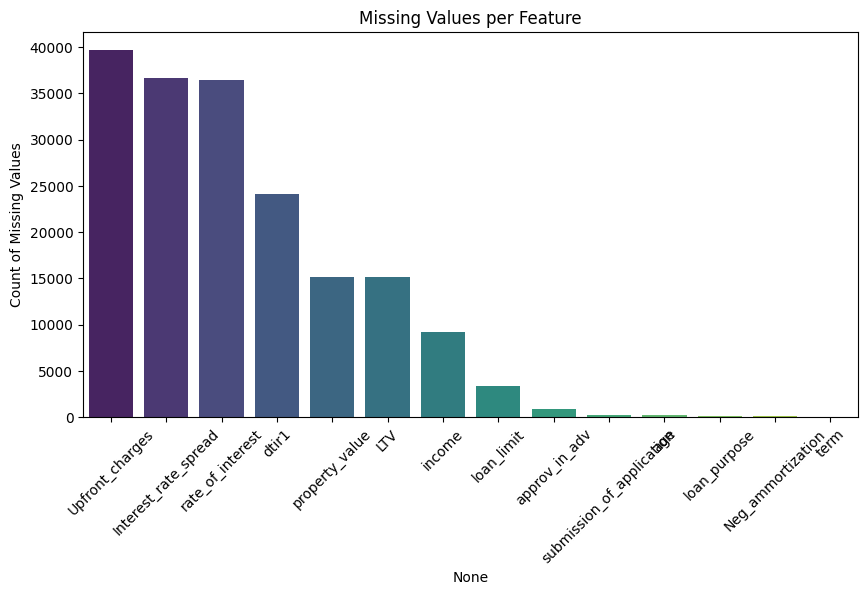

In [10]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values, palette="viridis")
plt.title("Missing Values per Feature")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.show()

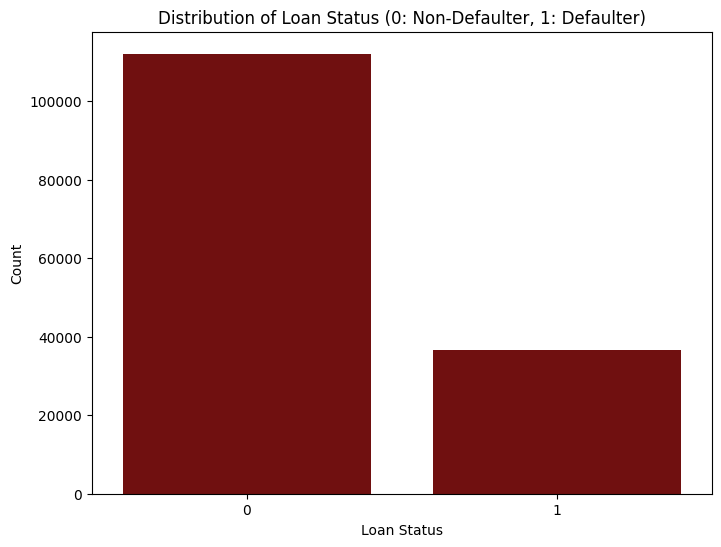

In [11]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=df,color = 'maroon')
plt.title('Distribution of Loan Status (0: Non-Defaulter, 1: Defaulter)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [12]:
# Print the exact counts
print("\nLoan Status Counts:")
print(df['Status'].value_counts())
print("\nLoan Status Proportions:")
print(df['Status'].value_counts(normalize=True) * 100)


Loan Status Counts:
Status
0    112031
1     36639
Name: count, dtype: int64

Loan Status Proportions:
Status
0    75.355485
1    24.644515
Name: proportion, dtype: float64


**DATA PREPROCESSING**

In [13]:
# Drop the ID column
df.drop('ID', axis=1, inplace=True)

In [14]:
df['year'].value_counts()

,count
year,
2019,148670


In [15]:
#Dropping the year columns since it is having same information across all the rows
df.drop('year', axis=1, inplace=True)
print("year column dropped.")

year column dropped.


In [16]:
num_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {list(num_cols)}")

Numerical columns: ['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']


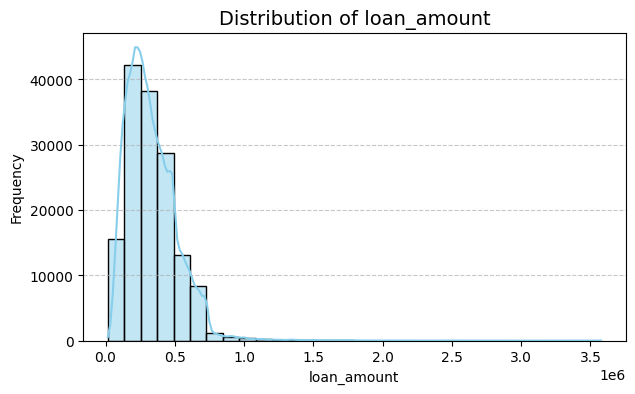

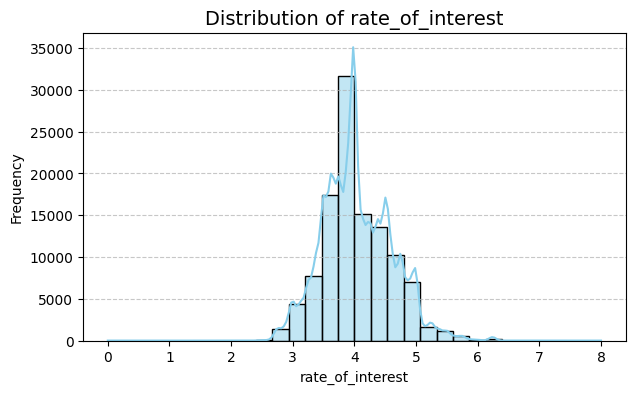

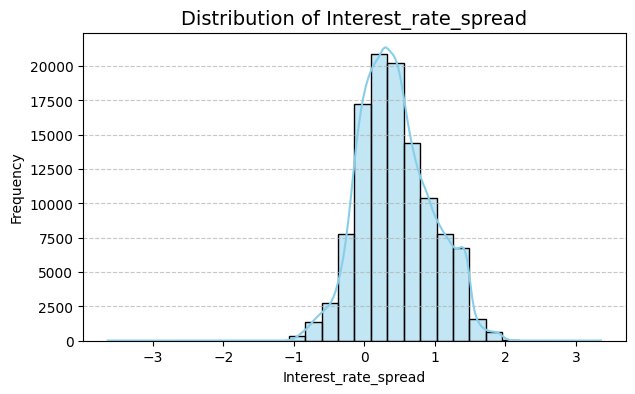

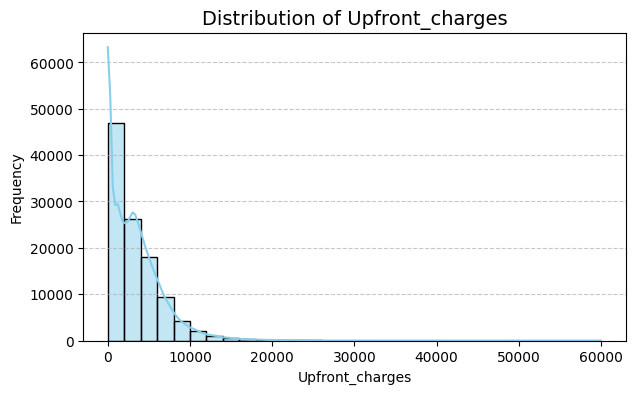

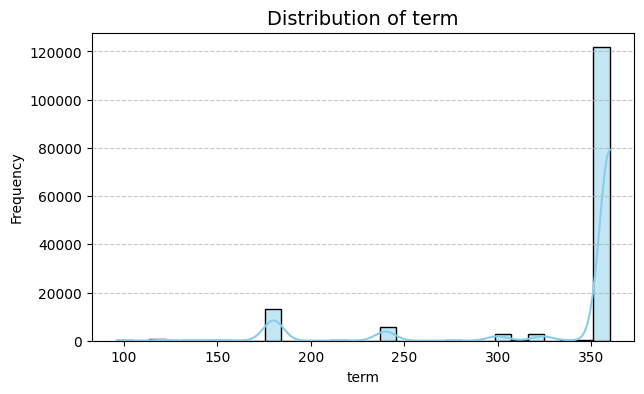

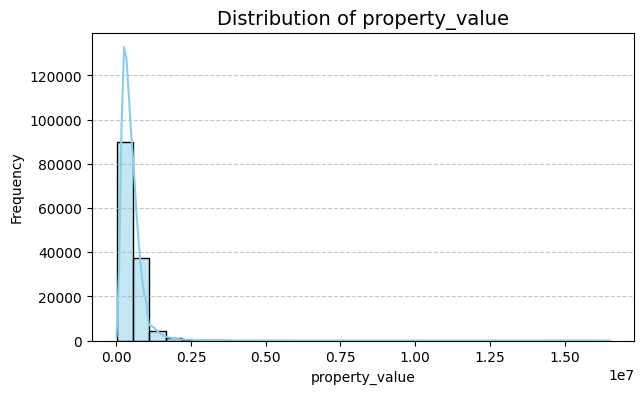

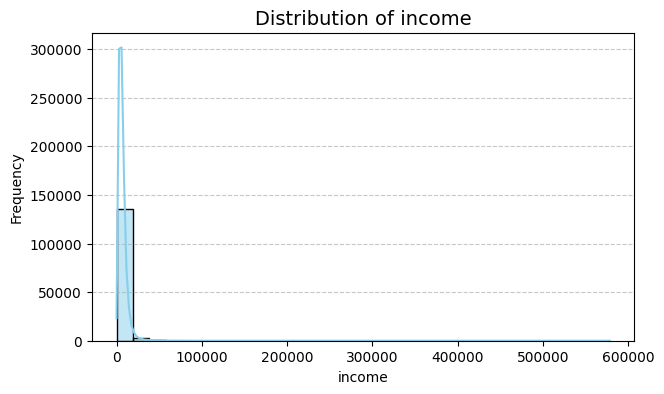

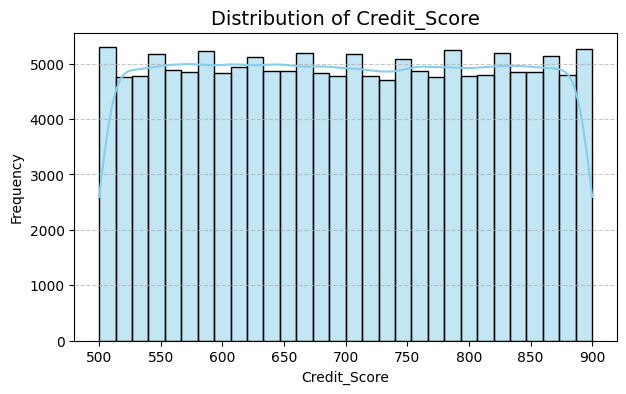

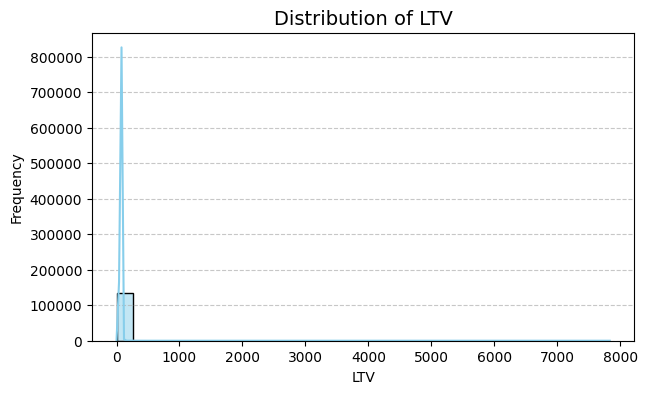

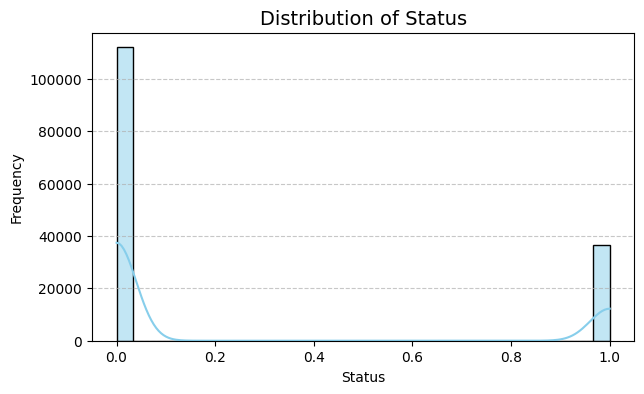

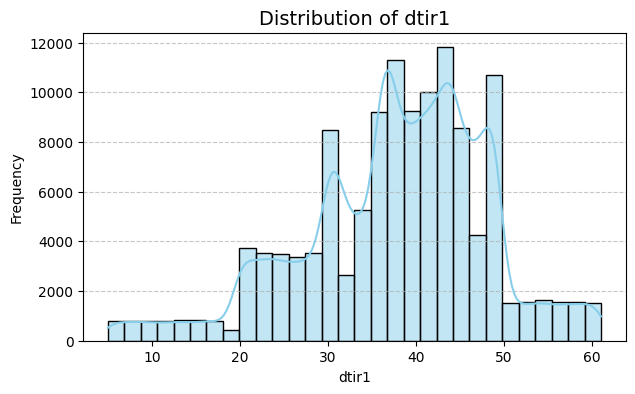

In [17]:
for col in num_cols:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

**HANDLING NULL VALUES**

In [18]:
for i in num_cols:
  df[i].fillna(df[i].median(), inplace=True)

/tmp/ipython-input-2075348528.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(), inplace=True)


In [19]:
# Identify categorical columns (dtype='object')
categorical_cols = df.select_dtypes(include=['object']).columns

print(f"\nCategorical columns to be encoded: {list(categorical_cols)}")


Categorical columns to be encoded: ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']


In [20]:
for i in categorical_cols:
  df[i].fillna(df[i].mode()[0], inplace=True)
print('handled null values in categorical features')

/tmp/ipython-input-1650952292.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace=True)


handled null values in categorical features


**LABEL ENCODING**

In [21]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
# Separate features (X) and target (y)
X = df.drop('Status', axis=1)
y = df['Status']

print("\nFeatures (X) shape:", X.shape)
print("Target (y) shape:", y.shape)


Features (X) shape: (148670, 31)
Target (y) shape: (148670,)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

**TRAIN TEST SPLIT**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (118936, 31)
Testing set shape: (29734, 31)


**APPLYING SCALING TO THE TRAIN AND TEST SETS**

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling applied successfully.")


Feature scaling applied successfully.


In [27]:
X_train_scaled

array([[-0.26853985,  1.32312977, -0.43048585, ...,  1.09007319,
         0.01390751, -2.89098193],
       [-0.26853985, -1.52120863, -0.43048585, ..., -0.9756175 ,
         0.01390751,  1.14357891],
       [-0.26853985, -1.52120863, -0.43048585, ..., -0.9756175 ,
         0.01390751,  1.76428058],
       ...,
       [-0.26853985, -1.52120863, -0.43048585, ..., -0.9756175 ,
         0.01390751, -1.54612832],
       [-0.26853985,  1.32312977, -0.43048585, ...,  1.09007319,
         0.01390751, -2.47718082],
       [-0.26853985, -0.57309583, -0.43048585, ...,  1.09007319,
         0.01390751,  0.10907613]])

**MODEL BUILDING**

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

**HANDLING IMBALANCE** WITH Algorithm-Level Approach USING  **class_weight="balanced"**  SETTING

*LogisticRegression*

In [29]:
lr = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:, 1]))
print(confusion_matrix(y_test, y_pred_lr), "\n")

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.87      0.71      0.78     22406
           1       0.43      0.68      0.53      7328

    accuracy                           0.70     29734
   macro avg       0.65      0.69      0.65     29734
weighted avg       0.76      0.70      0.72     29734

ROC-AUC: 0.764453292639955
[[15820  6586]
 [ 2326  5002]] 



Random Forest Classifier

In [30]:
rf = RandomForestClassifier(class_weight="balanced", n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))
print(confusion_matrix(y_test, y_pred_rf), "\n")

Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734

ROC-AUC: 0.9999999999999999
[[22406     0]
 [    2  7326]] 



*XGB Classifier*

In [31]:
scale_pos_weight = (y == 0).sum() / (y == 1).sum()
xgb = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
    eval_metric="logloss"
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))

XGBoost Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734

ROC-AUC: 0.9999945033584267


*KNN CLASSIFIER*

In [32]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("K-Nearest Neighbors Results:")
print(classification_report(y_test, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1]))
print(confusion_matrix(y_test, y_pred_knn), "\n")

K-Nearest Neighbors Results:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     22406
           1       0.80      0.84      0.82      7328

    accuracy                           0.91     29734
   macro avg       0.87      0.88      0.88     29734
weighted avg       0.91      0.91      0.91     29734

ROC-AUC: 0.954776319028317
[[20899  1507]
 [ 1207  6121]] 



*DECISION TREE CLASSIFICATION*

In [33]:
dt = DecisionTreeClassifier(class_weight="balanced", random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Results:")
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))
print(confusion_matrix(y_test, y_pred_dt), "\n")

Decision Tree Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734

ROC-AUC: 0.9997953056768558
[[22406     0]
 [    3  7325]] 



*GUASSIAN NB*

In [34]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

print("Naive Bayes Results:")
print(classification_report(y_test, y_pred_nb))
print("ROC-AUC:", roc_auc_score(y_test, nb.predict_proba(X_test_scaled)[:, 1]))
print(confusion_matrix(y_test, y_pred_nb), "\n")

Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     22406
           1       1.00      0.09      0.16      7328

    accuracy                           0.78     29734
   macro avg       0.89      0.54      0.52     29734
weighted avg       0.83      0.78      0.70     29734

ROC-AUC: 0.9998621302212795
[[22406     0]
 [ 6688   640]] 



**SMOTE + Tomek Links for handling imbalance**

In [35]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

print("Before Resampling:", y_train.value_counts(normalize=True))
print("After Resampling:", y_train_res.value_counts(normalize=True))

Before Resampling: Status
0    0.753557
1    0.246443
Name: proportion, dtype: float64
After Resampling: Status
0    0.5
1    0.5
Name: proportion, dtype: float64


In [36]:
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [37]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier( ),
    "Naive Bayes": GaussianNB()
}

In [38]:
for name, model in models.items():
    print(f"--- Training {name} ---")
    model.fit(X_train_res_scaled, y_train_res)
    print(f"{name} trained successfully.")

--- Training Logistic Regression ---
Logistic Regression trained successfully.
--- Training Random Forest ---
Random Forest trained successfully.
--- Training XGBoost ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:19:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost trained successfully.
--- Training K-Nearest Neighbors ---
K-Nearest Neighbors trained successfully.
--- Training Decision Tree ---
Decision Tree trained successfully.
--- Training Naive Bayes ---
Naive Bayes trained successfully.



--- Evaluation for Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81     22406
           1       0.45      0.56      0.50      7328

    accuracy                           0.72     29734
   macro avg       0.65      0.67      0.65     29734
weighted avg       0.75      0.72      0.73     29734

ROC-AUC Score: 0.7200


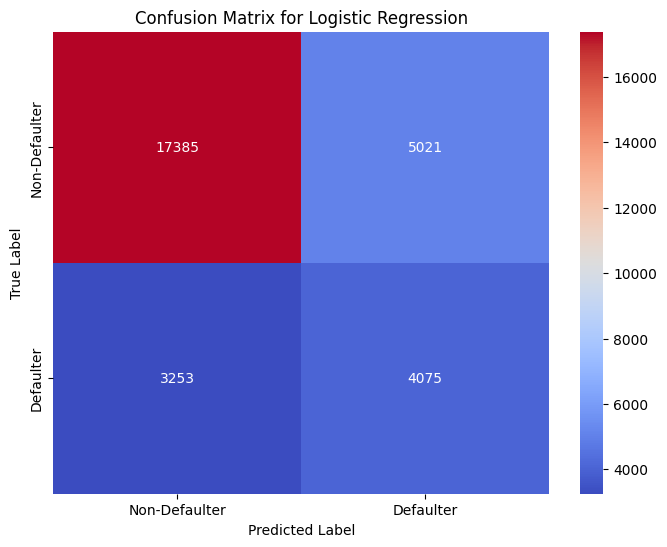


--- Evaluation for Random Forest ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734

ROC-AUC Score: 1.0000


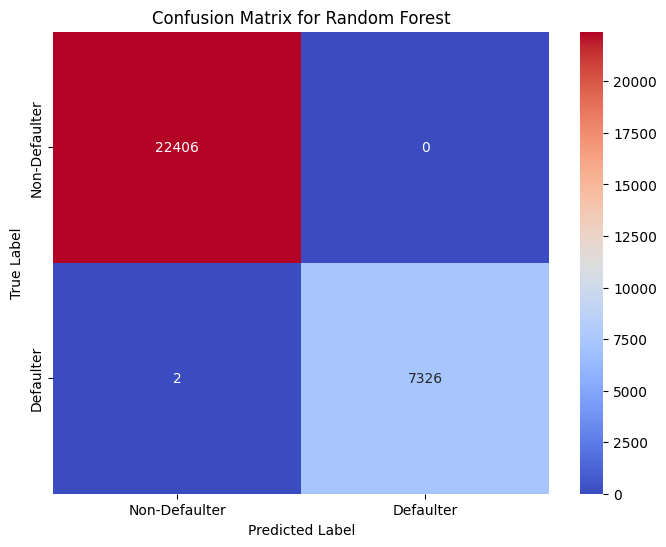


--- Evaluation for XGBoost ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734

ROC-AUC Score: 1.0000


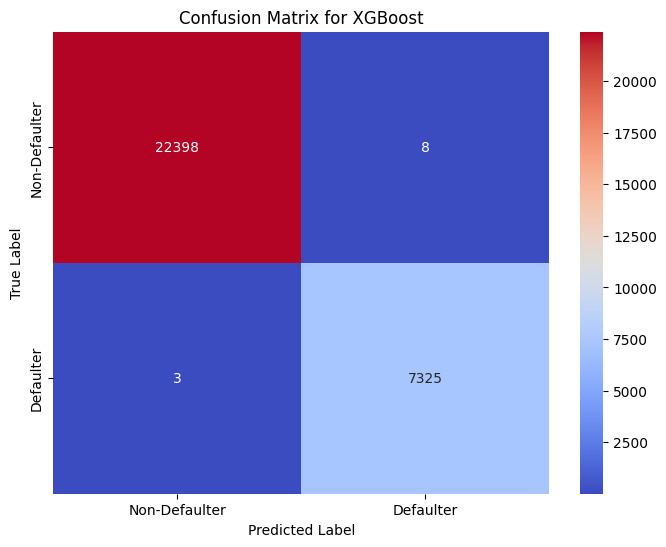


--- Evaluation for K-Nearest Neighbors ---
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93     22406
           1       0.75      0.92      0.82      7328

    accuracy                           0.90     29734
   macro avg       0.86      0.91      0.88     29734
weighted avg       0.92      0.90      0.91     29734

ROC-AUC Score: 0.9643


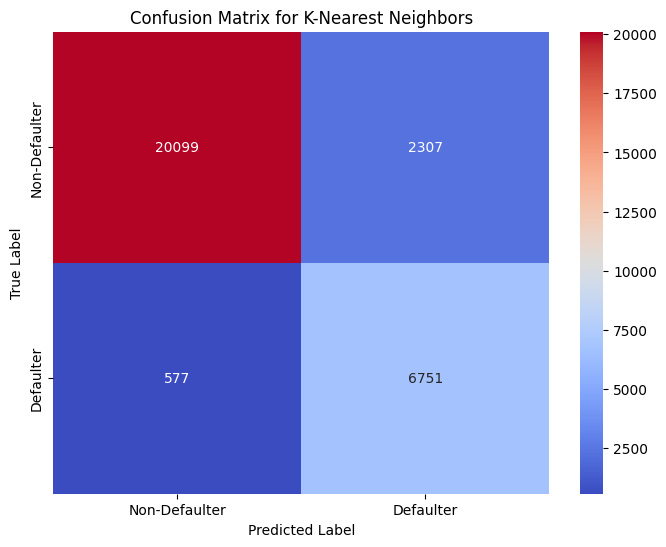


--- Evaluation for Decision Tree ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734

ROC-AUC Score: 0.9999


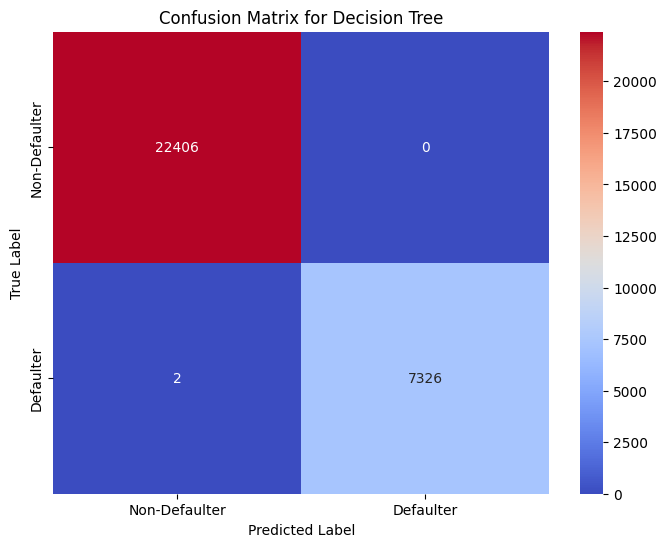


--- Evaluation for Naive Bayes ---
Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     22406
           1       1.00      0.08      0.15      7328

    accuracy                           0.77     29734
   macro avg       0.88      0.54      0.51     29734
weighted avg       0.83      0.77      0.69     29734

ROC-AUC Score: 0.9993


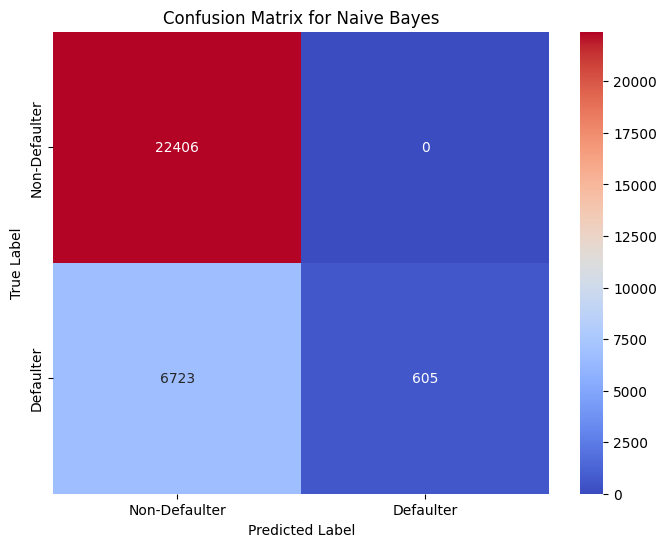

In [39]:
for name, model in models.items():
    print(f"\n--- Evaluation for {name} ---")

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Print Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Print ROC-AUC Score
    auc_score = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC-AUC Score: {auc_score:.4f}")

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Non-Defaulter', 'Defaulter'], yticklabels=['Non-Defaulter', 'Defaulter'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()